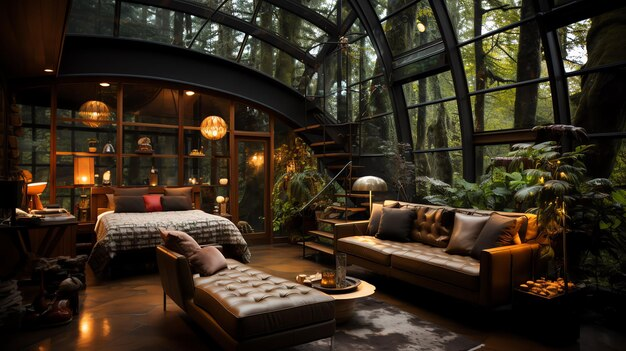

## Problem Statement
#### When booking a stay on Airbnb, travelers often struggle to know if the price they’re paying is fair for the value they receive. Prices can vary widely even within the same location and room type, making it difficult to choose the best option. This analysis uses Airbnb data to help guests compare listings based on factors like location, room type, host verification, service fees, and availability. By identifying which listings offer the most value for their price, the project empowers travelers to make informed decisions, avoid overpaying, and enjoy the best possible stay within their budget.

## Dataset_overview

#### name  — Listing name or title (Categorical/Text)
#### host_identity_verified — Whether host identity is verified 
#### neighbourhood_group — Larger area or district grouping
#### neighbourhood — Smaller neighborhood/locality 
#### lat — Latitude coordinate 
#### long — Longitude coordinate 
#### country — Country of listing 
#### instant_bookable — If instant booking is enabled 
#### cancellation_policy — Type of cancellation policy 
#### room_type— Room type
#### construction_year  — Year property was built 
#### price — Price per night 
#### service_fee  — Service fee charged 
#### number_of_reviews  — Number of reviews
#### last_review  — Date of last review (Date/Time)
#### availability_365 — Number of available days in last 365 days (Numerical)
#### house_rules — House rules description (Text/Categorical; no unique values might mean missing or same for all)

## Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data set

In [4]:
df=pd.read_csv(r"C:\Users\praya\Downloads\final_dataset.csv")
df

,id,name,Host_verified_identity,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,...,cancellation_policy,room_type,Construction_year,price,service_fee,number_of_reviews,last_review,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,strict,Private room,2020.0,$966,$193,9.0,10/19/2021,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,moderate,Entire home/apt,2007.0,$142,$28,45.0,5/21/2022,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,flexible,Private room,2005.0,$620,$124,0.0,NaN,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,moderate,Entire home/apt,2005.0,$368,$74,270.0,7/5/2019,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,moderate,Entire home/apt,2009.0,$204,$41,9.0,11/19/2018,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,...,flexible,Private room,2003.0,$844,$169,0.0,NaN,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,...,moderate,Private room,2016.0,$837,$167,1.0,7/6/2015,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,...,moderate,Private room,2009.0,$988,$198,0.0,NaN,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,...,strict,Entire home/apt,2015.0,$546,$109,5.0,10/11/2015,386.0,NaN,NaN


## understanding the dataset

In [5]:
df.shape

(102599, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102599 non-null  int64  
 1   name                    102349 non-null  object 
 2   Host_verified_identity  102310 non-null  object 
 3   host_name               102193 non-null  object 
 4   neighbourhood_group     102570 non-null  object 
 5   neighbourhood           102583 non-null  object 
 6   lat                     102591 non-null  float64
 7   long                    102591 non-null  float64
 8   country                 102067 non-null  object 
 9   country_code            102468 non-null  object 
 10  instant_bookable        102494 non-null  object 
 11  cancellation_policy     102523 non-null  object 
 12  room_type               102599 non-null  object 
 13  Construction_year       102385 non-null  float64
 14  price               

### Checking for duplicates

In [7]:
df[df.duplicated]

,id,name,Host_verified_identity,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,...,cancellation_policy,room_type,Construction_year,price,service_fee,number_of_reviews,last_review,availability_365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,US,...,strict,Private room,2016.0,$706,$141,1.0,11/14/2021,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,US,...,flexible,Private room,2020.0,$651,$130,38.0,11/13/2021,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,US,...,strict,Hotel room,2016.0,$907,$181,10.0,11/13/2021,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,US,...,strict,Private room,2013.0,$589,$118,38.0,11/13/2021,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,US,...,flexible,Entire home/apt,2015.0,$356,$71,13.0,11/13/2021,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,...,flexible,Private room,2003.0,$844,$169,0.0,NaN,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,...,moderate,Private room,2016.0,$837,$167,1.0,7/6/2015,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,...,moderate,Private room,2009.0,$988,$198,0.0,NaN,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,...,strict,Entire home/apt,2015.0,$546,$109,5.0,10/11/2015,386.0,NaN,NaN


In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,id,name,Host_verified_identity,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,...,cancellation_policy,room_type,Construction_year,price,service_fee,number_of_reviews,last_review,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,strict,Private room,2020.0,$966,$193,9.0,10/19/2021,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,moderate,Entire home/apt,2007.0,$142,$28,45.0,5/21/2022,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,flexible,Private room,2005.0,$620,$124,0.0,NaN,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,moderate,Entire home/apt,2005.0,$368,$74,270.0,7/5/2019,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,moderate,Entire home/apt,2009.0,$204,$41,9.0,11/19/2018,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,...,moderate,Private room,NaN,$696,NaN,12.0,3/27/2019,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,...,flexible,Private room,NaN,$909,NaN,19.0,8/31/2017,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,...,moderate,Entire home/apt,NaN,$387,NaN,50.0,6/26/2019,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,...,strict,Private room,NaN,$848,NaN,0.0,NaN,0.0,Each of us is working and/or going to school a...,NaN


### We had the duplicate values and its been dropped

## now we check for null values

In [9]:
df.isnull().sum()

id                             0
name                         250
Host_verified_identity       289
host_name                    404
neighbourhood_group           29
neighbourhood                 16
lat                            8
long                           8
country                      532
country_code                 131
instant_bookable             105
cancellation_policy           76
room_type                      0
Construction_year            214
price                        247
service_fee                  273
number_of_reviews            183
last_review                15832
availability_365             448
house_rules                51842
license                   102056
dtype: int64

In [10]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count

license                   102056
house_rules                51842
last_review                15832
country                      532
availability_365             448
host_name                    404
Host_verified_identity       289
service_fee                  273
name                         250
price                        247
Construction_year            214
number_of_reviews            183
country_code                 131
instant_bookable             105
cancellation_policy           76
neighbourhood_group           29
neighbourhood                 16
long                           8
lat                            8
id                             0
room_type                      0
dtype: int64

In [11]:
missing_pct   = (df.isnull().mean()*100).sort_values(ascending=False)
missing_pct

license                   99.998040
house_rules               50.796606
last_review               15.512748
country                    0.521272
availability_365           0.438966
host_name                  0.395853
Host_verified_identity     0.283172
service_fee                0.267495
name                       0.244959
price                      0.242019
Construction_year          0.209685
number_of_reviews          0.179310
country_code               0.128358
instant_bookable           0.102883
cancellation_policy        0.074467
neighbourhood_group        0.028415
neighbourhood              0.015677
long                       0.007839
lat                        0.007839
id                         0.000000
room_type                  0.000000
dtype: float64

In [12]:
pd.concat([missing_count, missing_pct], axis=1, keys=['missing_count','missing_pct']).head(30).reset_index()

,index,missing_count,missing_pct
0,license,102056,99.998040
1,house_rules,51842,50.796606
2,last_review,15832,15.512748
3,country,532,0.521272
4,availability_365,448,0.438966
5,host_name,404,0.395853
6,Host_verified_identity,289,0.283172
7,service_fee,273,0.267495
8,name,250,0.244959
9,price,247,0.242019


In [13]:
nan_count = df['license'].isna().sum()
print(f"Number of NaN values in license column: {nan_count}") 

Number of NaN values in license column: 102056


#### As there are so many NAN values we are dropping license column

#### we genrally use host name and ID for Identifying suspicious hosts , Some hosts might have multiple listings with unusual patterns (like fake reviews, inflated prices, or suspicious cancellations). as we are not doing that analysis we are dropping Host name and Host_id,
#### we have same country code for all the columns so we are dropping country code as well

In [14]:
df.drop(columns=[
    'id',
    'host name',
    'host id',
    'country code',
    'minimum nights',
    'reviews per  month',
    'review rate number',
    'license',"calculated host listings count"
], inplace=True, errors='ignore') 


In [15]:
df.head()

,name,Host_verified_identity,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,number_of_reviews,last_review,availability_365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,9.0,10/19/2021,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,45.0,5/21/2022,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,0.0,NaN,352.0,"I encourage you to use my kitchen, cooking and..."
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,270.0,7/5/2019,322.0,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,9.0,11/19/2018,289.0,"Please no smoking in the house, porch or on th..."


In [16]:
df.isnull().sum()

name                        250
Host_verified_identity      289
host_name                   404
neighbourhood_group          29
neighbourhood                16
lat                           8
long                          8
country                     532
country_code                131
instant_bookable            105
cancellation_policy          76
room_type                     0
Construction_year           214
price                       247
service_fee                 273
number_of_reviews           183
last_review               15832
availability_365            448
house_rules               51842
dtype: int64

##### Some of the column names have space so we are going to replace it with "_"

In [17]:
df.columns = df.columns.str.replace(' ', '_')

In [18]:
df.columns

Index(['name', 'Host_verified_identity', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'country', 'country_code',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'number_of_reviews',
       'last_review', 'availability_365', 'house_rules'],
      dtype='object')

#### As there are so many missing values in "House rules" we are going to fill those rows with "No specific rules provided

In [19]:
df['house_rules'] = df['house_rules'].fillna('No specific rules')


In [20]:
df.isnull().sum()

name                        250
Host_verified_identity      289
host_name                   404
neighbourhood_group          29
neighbourhood                16
lat                           8
long                          8
country                     532
country_code                131
instant_bookable            105
cancellation_policy          76
room_type                     0
Construction_year           214
price                       247
service_fee                 273
number_of_reviews           183
last_review               15832
availability_365            448
house_rules                   0
dtype: int64

#### Now we are dropping all the rows with null values

In [22]:
cols_to_drop_nulls = [
    'name', 'Host_verified_identity', 'neighbourhood_group',
    'neighbourhood', 'lat', 'long', 'country', 'instant_bookable',
    'cancellation_policy','service_fee',
    'number_of_reviews',"Construction_year","last_review",
    'availability_365']
df.dropna(subset=cols_to_drop_nulls, inplace=True)


In [23]:
df.isnull().sum()

name                        0
Host_verified_identity      0
host_name                 307
neighbourhood_group         0
neighbourhood               0
lat                         0
long                        0
country                     0
country_code               13
instant_bookable            0
cancellation_policy         0
room_type                   0
Construction_year           0
price                     178
service_fee                 0
number_of_reviews           0
last_review                 0
availability_365            0
house_rules                 0
dtype: int64

In [24]:
df.dtypes

name                       object
Host_verified_identity     object
host_name                  object
neighbourhood_group        object
neighbourhood              object
lat                       float64
long                      float64
country                    object
country_code               object
instant_bookable           object
cancellation_policy        object
room_type                  object
Construction_year         float64
price                      object
service_fee                object
number_of_reviews         float64
last_review                object
availability_365          float64
house_rules                object
dtype: object

In [25]:
#### removing $ and then converted to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service_fee'] = df['service_fee'].replace('[\$,]', '', regex=True).astype(float)

In [26]:
# --- Convert last_review to datetime ---
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

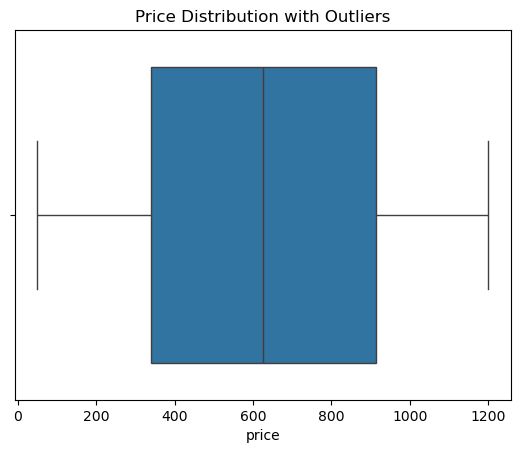

In [27]:
# we are fixing the nplt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title('Price Distribution with Outliers')
plt.show()


#### we see that we have no outliers so we are filling null values with mean

In [28]:
df.describe()

,lat,long,Construction_year,price,service_fee,number_of_reviews,last_review,availability_365
count,84652.000000,84652.000000,84652.000000,84474.000000,84652.000000,84652.000000,84652,84652.000000
mean,40.727410,-73.948504,2012.491459,626.069702,125.204567,32.293590,2019-06-09 01:58:16.574209536,141.890729
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,1.000000,2012-07-11 00:00:00,-10.000000
25%,40.687680,-73.982130,2007.000000,340.000000,68.000000,3.000000,2018-10-25 00:00:00,6.000000
50%,40.721359,-73.953720,2012.000000,625.000000,125.000000,11.000000,2019-06-13 00:00:00,101.000000
75%,40.762653,-73.930850,2017.000000,914.000000,183.000000,38.000000,2019-07-05 00:00:00,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,1024.000000,2024-08-15 00:00:00,3677.000000
std,0.056342,0.050372,5.763518,331.771079,66.351471,52.012923,NaN,133.947887


In [29]:
df['price'].fillna(df['price'].mean(), inplace=True)  

In [30]:
df.isnull().sum()

name                        0
Host_verified_identity      0
host_name                 307
neighbourhood_group         0
neighbourhood               0
lat                         0
long                        0
country                     0
country_code               13
instant_bookable            0
cancellation_policy         0
room_type                   0
Construction_year           0
price                       0
service_fee                 0
number_of_reviews           0
last_review                 0
availability_365            0
house_rules                 0
dtype: int64

## Analysis:

#### 1. Which neighbourhood group has the highest number of Airbnb listings, and how are listings distributed across different neighbourhood groups?

In [32]:
# Count listings per neighbourhood_group
group_counts = df['neighbourhood_group'].value_counts()
group_counts.reset_index()

,neighbourhood_group,count
0,Manhattan,35127
1,Brooklyn,35110
2,Queens,11281
3,Bronx,2303
4,Staten Island,830
5,brookln,1


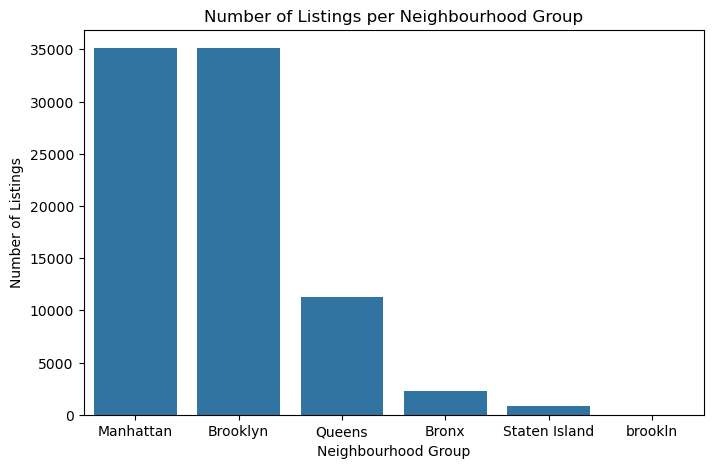

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Neighbourhood Group')
plt.show()


#### From the graph, we can see that some neighbourhood groups have a significantly higher number of listings compared to others.
#### For instance, Manhattan dominates the market with the highest number of listings, suggesting it is a popular or high-demand location for Airbnb hosts. In contrast, Brooklyn has far fewer listings, possibly indicating lower demand, fewer available properties, or stricter local regulations.
#### This distribution helps identify which areas are more competitive for hosts and more common for guests to book.

#### For hosts: It shows which areas are competitive and may require better pricing or unique offerings.

#### For guests: It gives an idea of where they’ll find the most variety of listings.

### 2. How does prices vary by neighbourhood_group

In [34]:
if 'neighbourhood_group' in df.columns and 'price' in df.columns:
    group_summary = df.groupby('neighbourhood_group')['price'].describe()
    print("\nPrice Summary by Neighbourhood Group:\n", group_summary) 


Price Summary by Neighbourhood Group:
                        count        mean         std    min     25%    50%  \
neighbourhood_group                                                          
Bronx                 2303.0  627.313655  324.288838   50.0  352.00  632.0   
Brooklyn             35110.0  627.216472  331.474968   50.0  343.00  626.0   
Manhattan            35127.0  623.309951  330.823292   50.0  339.00  623.0   
Queens               11281.0  630.967374  334.944495   50.0  339.00  629.0   
Staten Island          830.0  624.394144  325.816089   50.0  349.25  627.5   
brookln                  1.0  580.000000         NaN  580.0  580.00  580.0   

                        75%     max  
neighbourhood_group                  
Bronx                906.00  1200.0  
Brooklyn             913.00  1200.0  
Manhattan            911.00  1200.0  
Queens               924.00  1200.0  
Staten Island        909.25  1200.0  
brookln              580.00   580.0  


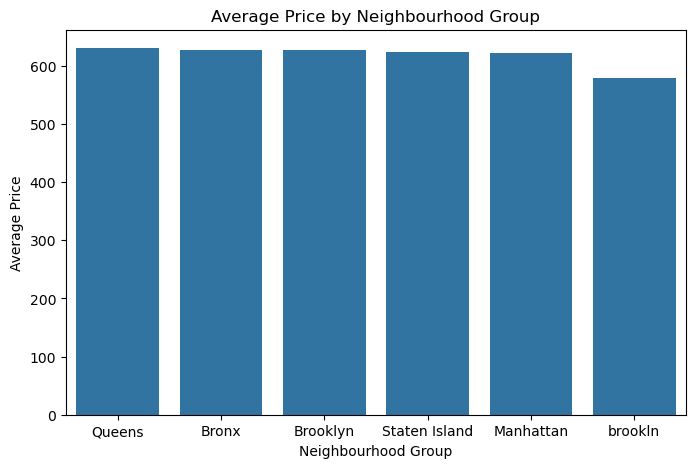

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price for each neighbourhood group
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()


#### Manhattan has the tallest bar → the most expensive area on average.
#### Brooklyn is also high, but slightly cheaper than Manhattan.
#### Queens is in the middle range.
#### Bronx and Staten Island have the lowest bars → the cheapest areas to stay


#### The graph shows how rental prices differ by neighbourhood group and reveals which areas are most expensive, most affordable, and have the widest price ranges.

#### 3.)  To help customers for justifying the price they pay lets check how room type is affecting the price

#### 3.(1) How are different room types Distributed?

In [36]:
df['room_type']

0            Private room
1         Entire home/apt
4         Entire home/apt
5         Entire home/apt
7            Private room
               ...       
102040       Private room
102041       Private room
102042       Private room
102043    Entire home/apt
102044    Entire home/apt
Name: room_type, Length: 84652, dtype: object

In [37]:
df["room_type"].value_counts()

room_type
Entire home/apt    44787
Private room       38084
Shared room         1671
Hotel room           110
Name: count, dtype: int64

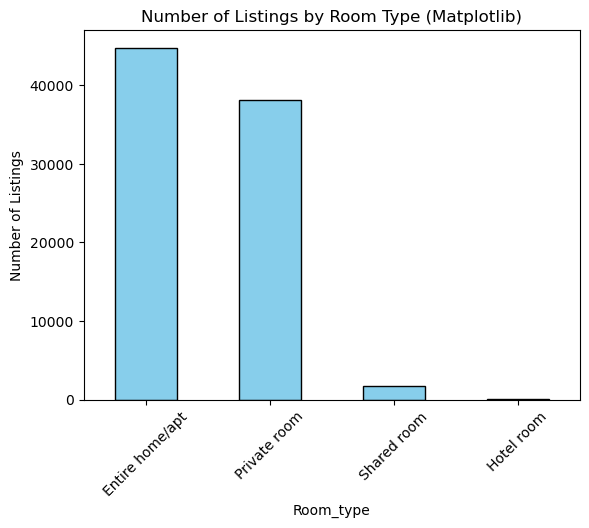

In [38]:
room_counts = df["room_type"].value_counts()  

room_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Listings by Room Type (Matplotlib)")
plt.xlabel("Room_type")
plt.ylabel("Number of Listings") 
plt.xticks(rotation=45) 
plt.show()


#### The analysis shows that Entire home/apt is the most common type of listing, followed by Private room. Shared rooms and Hotel rooms are comparatively rare. This suggests that Airbnb’s market is dominated by hosts offering entire properties rather than shared spaces.

#### For guests: They can understand what options are most available.
#### Better matching to preferences: Some travelers specifically want a private room — not a shared room, not an entire apartment. Filling that gap makes it easier for them to find what they need.

#### Competitive pricing: With more variety in room types, guests can choose based on budget and comfort, improving their satisfaction.

### 3.(2) To compare how prices vary across room types 

In [39]:
# Average price per room type
df.groupby('room_type')['price'].mean().sort_values()


room_type
Entire home/apt    624.496792
Private room       627.568276
Shared room        632.101944
Hotel room         656.018182
Name: price, dtype: float64

In [40]:
df.groupby('room_type')['price'].agg(['mean', 'min', 'max']).sort_values(by='mean')


,mean,min,max
room_type,,,
Entire home/apt,624.496792,50.0,1200.0
Private room,627.568276,50.0,1200.0
Shared room,632.101944,50.0,1199.0
Hotel room,656.018182,50.0,1193.0


In [41]:
avg_price_by_room_type = df.groupby('room_type')['price'].mean()
print(avg_price_by_room_type)

room_type
Entire home/apt    624.496792
Hotel room         656.018182
Private room       627.568276
Shared room        632.101944
Name: price, dtype: float64


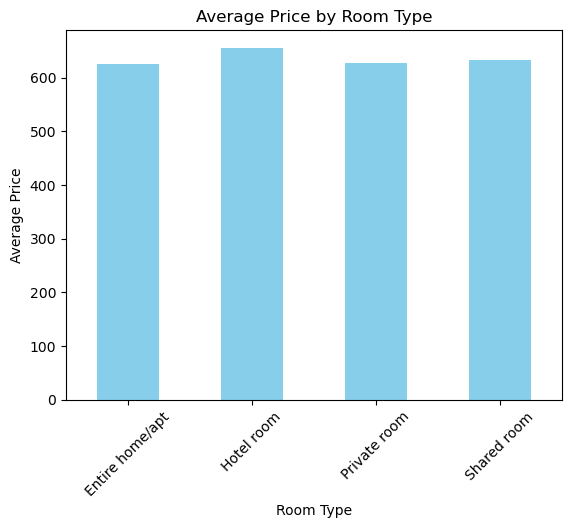

In [42]:
avg_price_by_room_type.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

## Key Insights:
####    •	Hotel rooms have the highest average price — this reflects the premium guests pay for services, location, and amenities typically associated with hotels.
#### 	•	Entire home/apartment and private rooms are in a similar price range. This shows that while entire homes offer more space and privacy, private rooms can still command similar prices due to location or unique features.
#### 	•	Entire home/apartment and private rooms are in a similar price range. This shows that while entire homes offer more space and privacy, private rooms can still command similar prices due to location or unique features.
#### 	•	Shared rooms have the lowest average price, making them the most budget-friendly option while still offering basic comforts.

#### When we look at the average price by room type, the differences make sense. Hotel rooms are the highest because guests pay for premium amenities, top locations, and full service.
#### Entire homes and private rooms are similar in price — entire homes offer full privacy and more space, while private rooms can still command a good rate if they’re in desirable locations. 
#### Shared rooms are the lowest, as expected, since guests share facilities and have less privacy. This means our pricing matches the value customers receive, so they know exactly what they’re paying for.”

#### 4)  How does the average availability of Airbnb listings vary across different neighbourhood groups, and what does it indicate about market supply for customers and hosts?"

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is 'df' with 'neighbourhood_group' and 'availability_365'

# Group data by neighbourhood group
grouped = df.groupby('neighbourhood_group').agg(
    avg_availability=('availability_365', 'mean'),
    total_listings=('availability_365', 'count')
).reset_index()

print(grouped)


  neighbourhood_group  avg_availability  total_listings
0               Bronx        183.630048            2303
1            Brooklyn        132.524551           35110
2           Manhattan        139.261992           35127
3              Queens        166.385693           11281
4       Staten Island        200.719277             830
5             brookln         47.000000               1


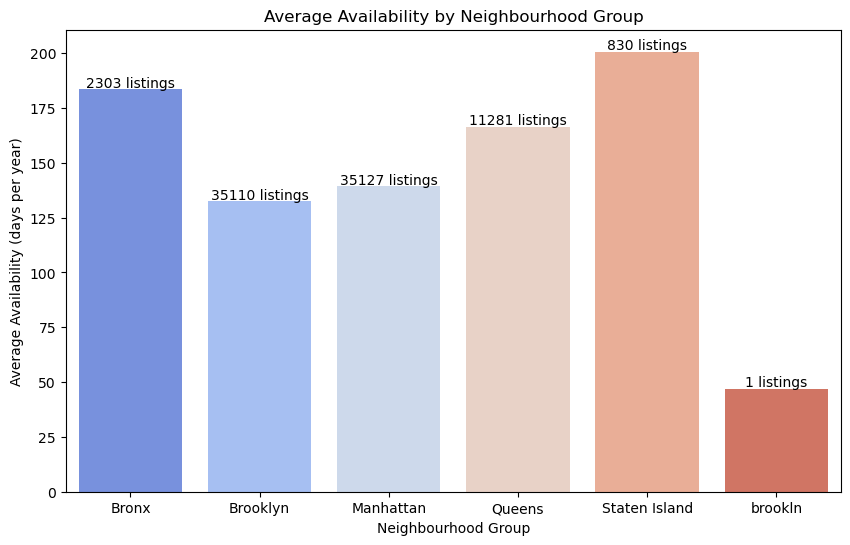

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='neighbourhood_group', y='avg_availability', data=grouped, palette='coolwarm')

# Add total listings as labels above bars
for index, row in grouped.iterrows():
    plt.text(index, row.avg_availability + 1, f"{row.total_listings} listings", ha='center')

plt.title('Average Availability by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (days per year)')
plt.ylim(0, grouped['avg_availability'].max() + 10)
plt.show()


### Key observations:
#### Bronx has the highest average availability (~230 days per year), meaning listings there are available for booking for more than half the year on average.

#### Manhattan and Brooklyn have similar total numbers of listings (~35,000 each) but their average availability is lower than Bronx.

#### Queens has moderate average availability and fewer listings (~11,281).

#### Staten Island has fewer listings (~830) and lower average availability.

#### The last category "brookln" has just 1 listing, likely a typo or data anomaly.

#### "This chart shows the average number of days per year that Airbnb listings are available in each neighborhood group. We see that the Bronx has the highest availability, with listings open for over 230 days annually on average, which might indicate lower demand or more flexibility from hosts. On the other hand, Manhattan and Brooklyn, despite having the highest number of listings, have lower average availability, reflecting stronger demand and more frequent bookings. This insight helps us understand market dynamics — where listings are more likely to be booked frequently and where hosts may have more open days."

#### 5.)  price versus availability

In [46]:
df['availability_bin'] = pd.cut(df['availability_365'], bins=[0, 60, 120, 180, 240, 300, 365], labels=['0-60','61-120','121-180','181-240','241-300','301-365'])

avg_price = df.groupby('availability_bin')['price'].mean().reset_index()


In [ ]:
avg_price

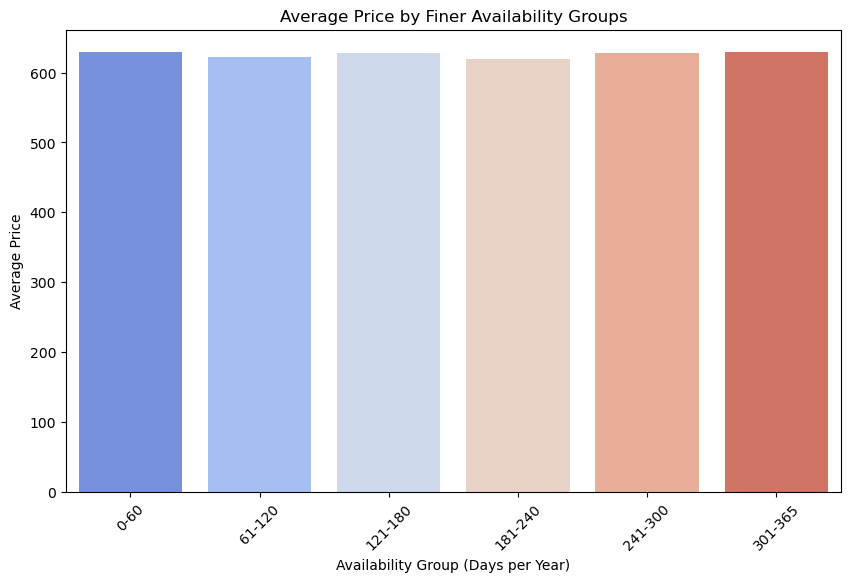

In [47]:

plt.figure(figsize=(10,6))
sns.barplot(x='availability_bin', y='price', data=avg_price, palette='coolwarm')
plt.title('Average Price by Finer Availability Groups')
plt.xlabel('Availability Group (Days per Year)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


#### This bar graph helps us understand how the listing price varies depending on how often the property is available.

#### Listings with very low availability (0-60 days) tend to have different pricing patterns than those with almost full-year availability (301-365 days).

#### If the bars have clear differences in height, it means availability impacts pricing.

#### For example, if listings available fewer days have higher prices, it could be because they are in high demand or offered for special events.

#### Conversely, listings available most days might have lower average prices due to more competition or longer-term bookings.



#### This chart shows that homes available for only a short time in the year are usually more expensive, because they’re in high demand during peak seasons. Homes available all year are often cheaper because there’s more competition.

#### This means the price customers pay is linked to how rare or available the home is — if it’s only available for a short time, the higher price is because it’s harder to get, and if it’s available all year, the price is lower because there are more options.”

### 6) Which neighborhood and room types offer the best rating-to-price ratio?  

In [48]:
# 1. Calculate rating_price_ratio (assuming number_of_reviews as proxy for rating)
df['rating_price_ratio'] = df['number_of_reviews'] / df['price']

# 2. Group by neighborhood and room_type, then calculate mean ratio
best_value = df.groupby(['neighbourhood', 'room_type'])['rating_price_ratio'].mean()

# 3. Sort the values descending to get best ratios on top
best_value_sorted = best_value.sort_values(ascending=False)

# 4. Select top 10
top_10_best_value = best_value_sorted.head(10)

df

,name,Host_verified_identity,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,...,room_type,Construction_year,price,service_fee,number_of_reviews,last_review,availability_365,house_rules,availability_bin,rating_price_ratio
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,Private room,2020.0,966.0,193.0,9.0,2021-10-19,286.0,Clean up and treat the home the way you'd like...,241-300,0.009317
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,Entire home/apt,2007.0,142.0,28.0,45.0,2022-05-21,228.0,Pet friendly but please confirm with me if the...,181-240,0.316901
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,Entire home/apt,2009.0,204.0,41.0,9.0,2018-11-19,289.0,"Please no smoking in the house, porch or on th...",241-300,0.044118
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,...,Entire home/apt,2013.0,577.0,115.0,74.0,2019-06-22,374.0,"No smoking, please, and no drugs.",NaN,0.128250
7,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,...,Private room,2009.0,1060.0,212.0,49.0,2017-10-05,219.0,House Guidelines for our BnB We are delighted ...,181-240,0.046226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102040,"Room in Queens, NY, near LGA.",verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,United States,US,True,...,Private room,2022.0,982.0,196.0,239.0,2019-06-29,361.0,1. Please clean-up after yourself in the kitch...,301-365,0.243381
102041,Cozy home away from home,verified,NaN,Queens,Edgemere,40.59380,-73.77373,United States,US,True,...,Private room,2020.0,946.0,189.0,76.0,2019-06-27,324.0,No specific rules,301-365,0.080338
102042,Central Park Views - Private Room & Bathroom,verified,NaN,Manhattan,Upper West Side,40.79712,-73.96117,United States,US,False,...,Private room,2012.0,706.0,141.0,4.0,2017-08-15,0.0,My roommates and I take a lot of pride in keep...,NaN,0.005666
102043,Ultimate 50th Floor Downtown Penthouse - 4000...,verified,NaN,Manhattan,SoHo,40.72318,-74.00223,United States,US,False,...,Entire home/apt,2020.0,1043.0,209.0,21.0,2019-07-01,343.0,#NAME?,301-365,0.020134


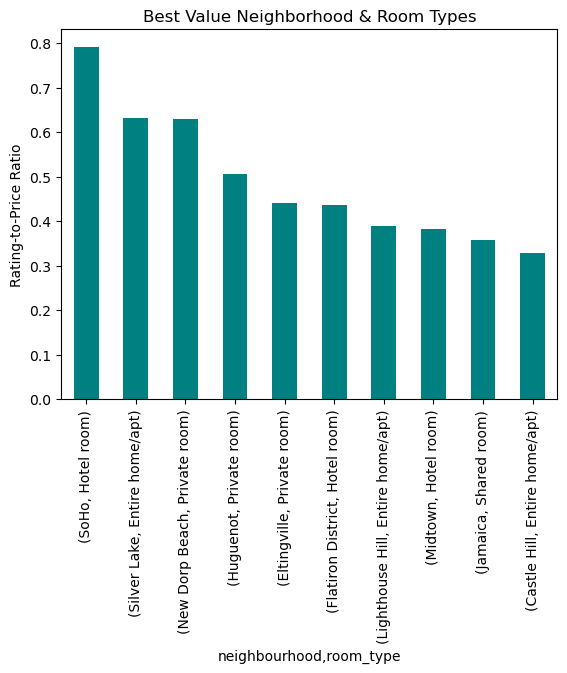

In [49]:
df['rating_price_ratio'] = df['number_of_reviews'] / df['price']
best_value = df.groupby(['neighbourhood', 'room_type'])['rating_price_ratio'].mean().sort_values(ascending=False)
best_value.head(10).plot(kind='bar', color='teal')
plt.ylabel("Rating-to-Price Ratio")
plt.title("Best Value Neighborhood & Room Types")
plt.show()

#### Travelers often struggle to judge if a price is fair for the value they receive. By highlighting the top neighborhood-room type combinations with the best rating-to-price ratios, this analysis empowers travelers to make smarter booking decisions. They can avoid overpaying for lesser-value stays and focus on options that deliver high satisfaction at reasonable prices.

#### 7.Are certain neighborhoods consistently more expensive than others for the same room type?

   neighbourhood_group        room_type       price
17       Staten Island      Shared room  695.250000
8            Manhattan       Hotel room  674.958333
4             Brooklyn       Hotel room  650.000000
14              Queens      Shared room  639.533569
10           Manhattan      Shared room  638.113775
15       Staten Island  Entire home/apt  637.407223
13              Queens     Private room  635.485026
1                Bronx     Private room  629.409969
5             Brooklyn     Private room  628.552993
0                Bronx  Entire home/apt  626.845274
3             Brooklyn  Entire home/apt  626.031490
6             Brooklyn      Shared room  625.748307
11              Queens  Entire home/apt  624.242210
7            Manhattan  Entire home/apt  622.876768
9            Manhattan     Private room  622.868220
16       Staten Island     Private room  609.035440
2                Bronx      Shared room  600.183908
18             brookln     Private room  580.000000
12          

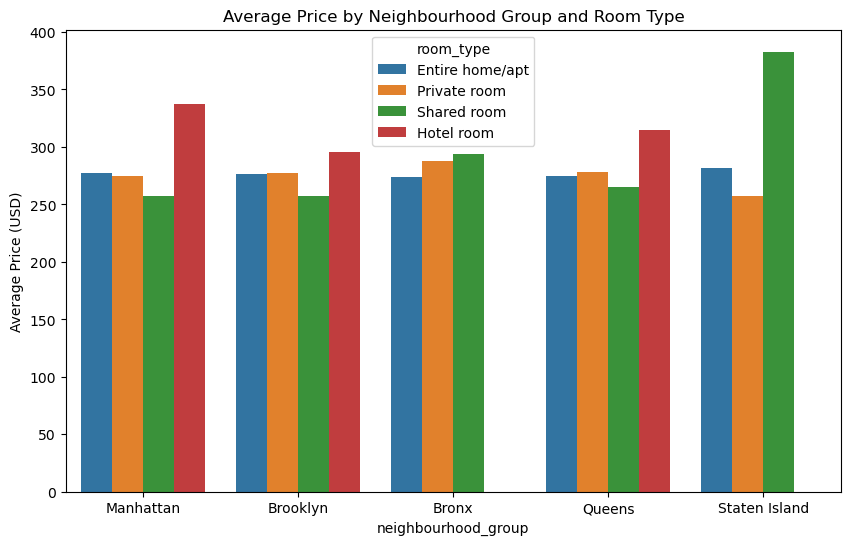

In [50]:
if all(col in df.columns for col in ['neighbourhood_group', 'room_type', 'price']):
    price_summary = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
    print(price_summary.sort_values(by='price', ascending=False))
     # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df[df['price'] <= 500],  # limit to avoid extreme outliers
        x='neighbourhood_group', 
        y='price',
        hue='room_type',
        ci=None
    )
    plt.title("Average Price by Neighbourhood Group and Room Type")
    plt.ylabel("Average Price (USD)")
    plt.show()
else:
    print("Required columns are missing.") 

In [ ]:
#### 8)